# Weak Coupling for Coupled Oscillators

### Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import *

### Pretty printing and big pictures

In [2]:
dpi = 180
mpl.rcParams['figure.dpi'] = dpi
init_printing()

### Solve for initial conditions

In [17]:
a1, a2, b1, b2 = symbols('a_1 a_2 b_1 b_2', real=True)
A1, A2, B1, B2 = symbols('A_1 A_2 B_1 B_2', real=True)
omega1, omega2 = symbols('omega_1 omega_2', real=True)
x0 = symbols('x_0', real=True)

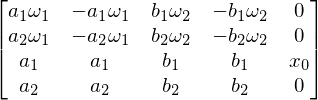

In [77]:
M = Matrix([[a1*omega1, -a1*omega1, b1*omega2, -b1*omega2, 0 ],
            [a2*omega1, -a2*omega1, b2*omega2, -b2*omega2, 0 ],
            [a1,        a1,         b1,        b1,        x0 ],
            [a2,        a2,         b2,        b2,         0 ]])
M

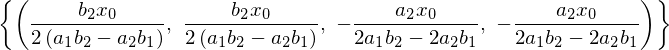

In [73]:
linsolve(M, (A1, A2, B1, B2))

### Just to make sure, we set the general case to the specific one in the book

In [58]:
epsilon = symbols('epsilon')
omega0 = symbols('omega_0')

In [78]:
Msimple = M.subs({a1: 1, a2: -1, b1: 1, b2: 1, omega1: omega0*(1 + epsilon), omega2: omega0*(1 - epsilon)})

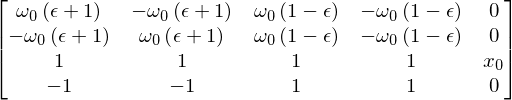

In [80]:
Msimple

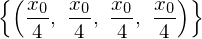

In [79]:
linsolve(Msimple, (A1, A2, B1, B2))

### We get the same thing as the book

## Write functions to calculate $A_+, A_-, B_+, B_-, a_1, a_2, b_1, b_2, \omega_1, \omega_2$

In [81]:
def a_vec(a, b):
    return (-a + b + np.sqrt(a**2 - 2*a*b + b**2 + 4))/2, 1

def b_vec(a, b):
    return (-a + b - np.sqrt(a**2 - 2*a*b + b**2 + 4))/2, 1

def A(alpha, beta, x0):
    a1, a2 = a_vec(alpha, beta)
    b1, b2 = b_vec(alpha, beta)
    
    return b2*x0 / (2*(a1*b2 - a2*b1))

def B(alpha, beta,  x0):
    a1, a2 = a_vec(alpha, beta)
    b1, b2 = b_vec(alpha, beta)
    
    return a2*x0 / (2*(a1*b2 - a2*b1))

def w1(a, b):
    return np.sqrt(2)/2 * np.sqrt(a + b - np.sqrt(a**2 - 2*a*b + b**2 + 4) + 2)

def w2(a, b):
    return np.sqrt(2)/2 * np.sqrt(a + b + np.sqrt(a**2 - 2*a*b + b**2 + 4) + 2)

## Write functions to calculate $x_1(t)$ and $x_2(t)$

In [84]:
def x1(t, alpha=1, beta=1, x0=1):
    return A(alpha, beta, x0)*a_vec(alpha, beta)[0]*np.exp(1j*w1(alpha, beta)*t) + \
               A(alpha, beta, x0)*a_vec(alpha, beta)[0]*np.exp(-1j*w1(alpha, beta)*t) + \
                   B(alpha, beta, x0)*b_vec(alpha, beta)[0]*np.exp(1j*w2(alpha, beta)*t) + \
                       B(alpha, beta, x0)*b_vec(alpha, beta)[0]*np.exp(-1j*w2(alpha, beta)*t)
            
def x2(t, alpha=1, beta=1, x0=1):
    return A(alpha, beta, x0)*a_vec(alpha, beta)[1]*np.exp(1j*w1(alpha, beta)*t) + \
               A(alpha, beta, x0)*a_vec(alpha, beta)[1]*np.exp(-1j*w1(alpha, beta)*t) + \
                   B(alpha, beta, x0)*b_vec(alpha, beta)[1]*np.exp(1j*w2(alpha, beta)*t) + \
                       B(alpha, beta, x0)*b_vec(alpha, beta)[1]*np.exp(-1j*w2(alpha, beta)*t)

## Make representative plots of $x_1(t)$ and $x_2(t)$ for various values of $\beta$

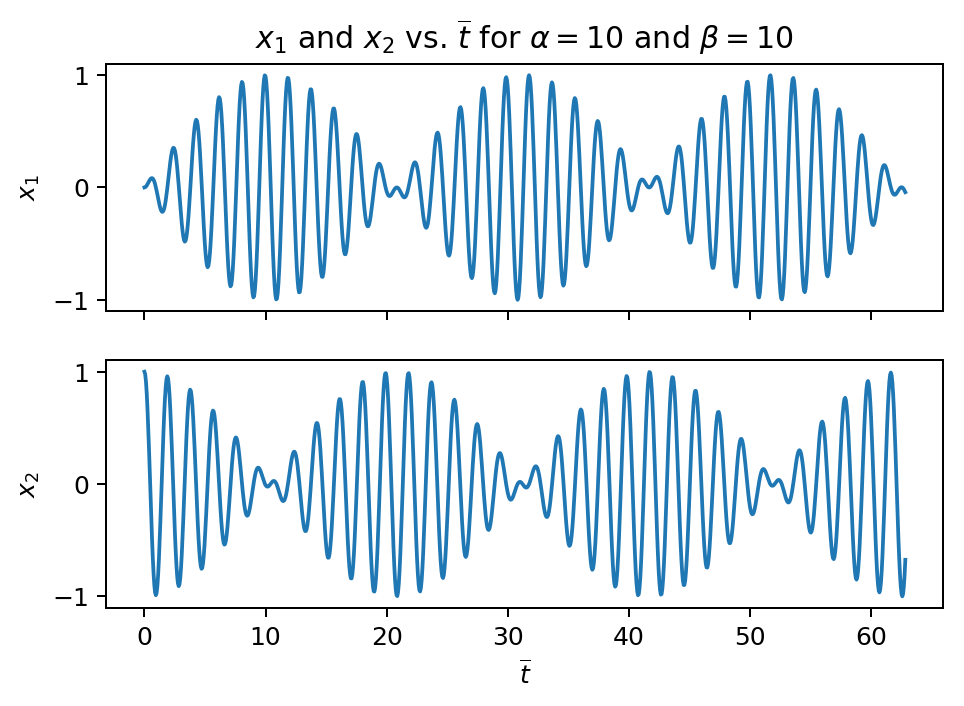

In [117]:
alpha = 10
beta = 10

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

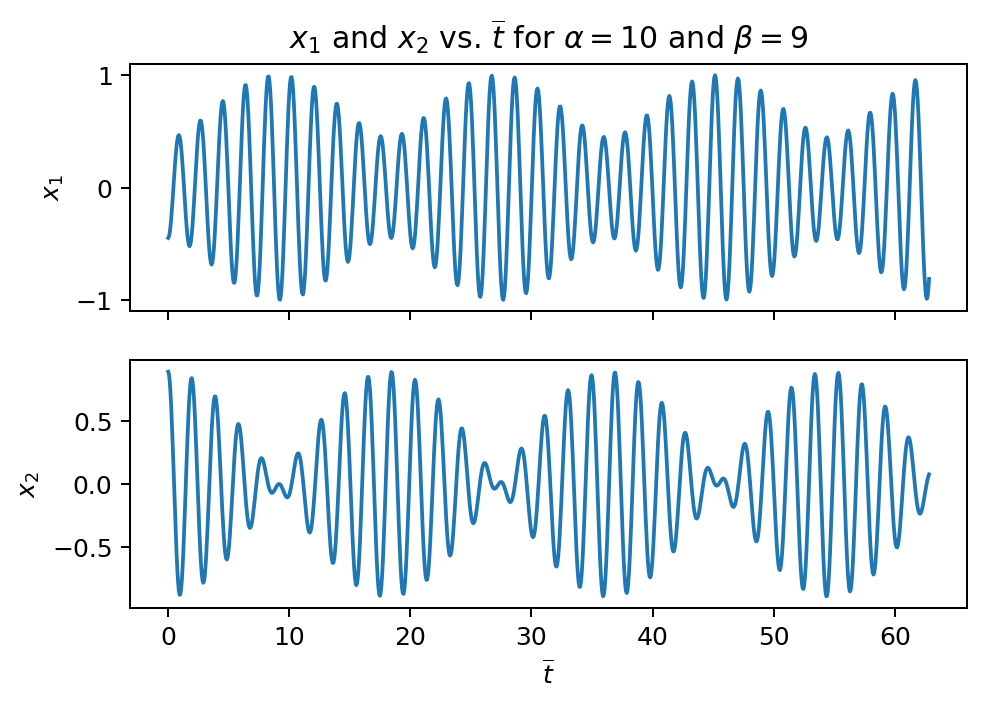

In [118]:
alpha = 10
beta = 9

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

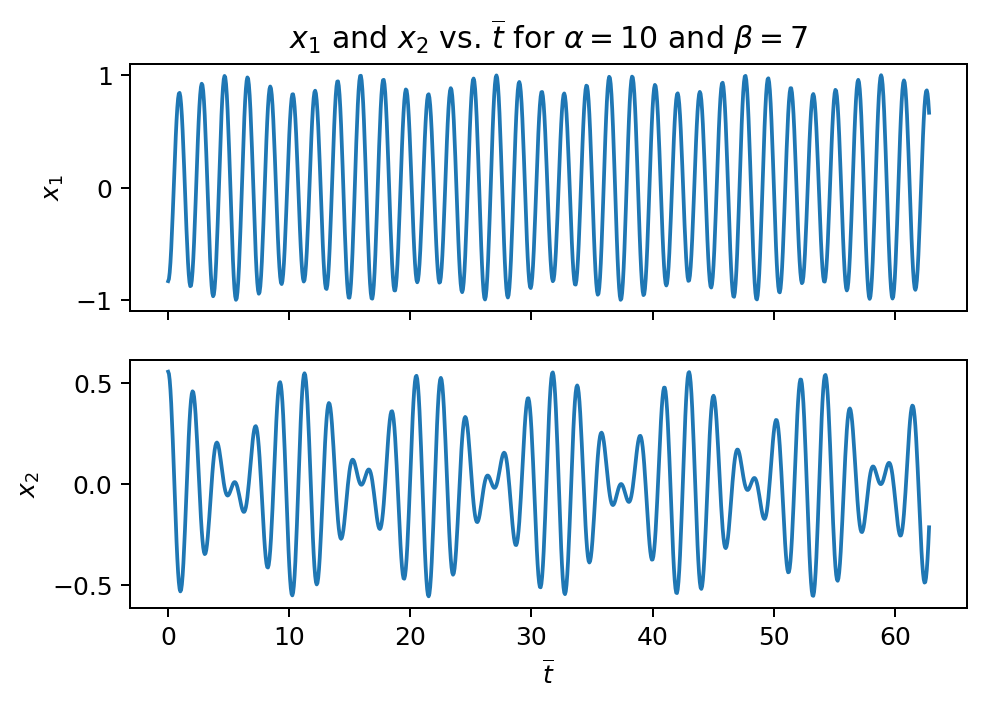

In [119]:
alpha = 10
beta = 7

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

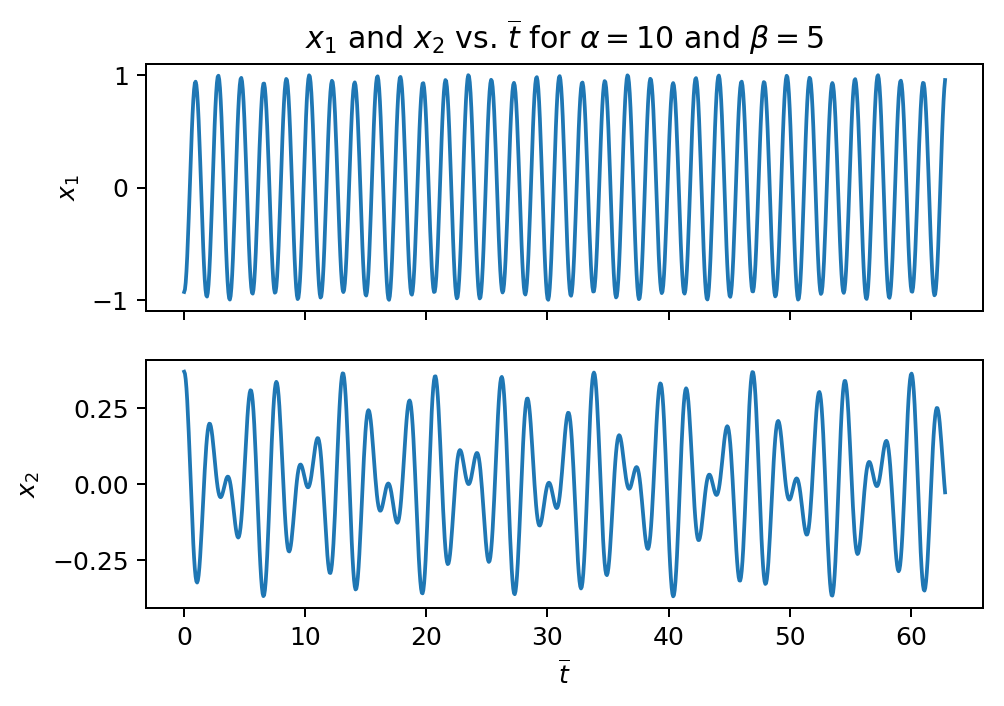

In [120]:
alpha = 10
beta = 5

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

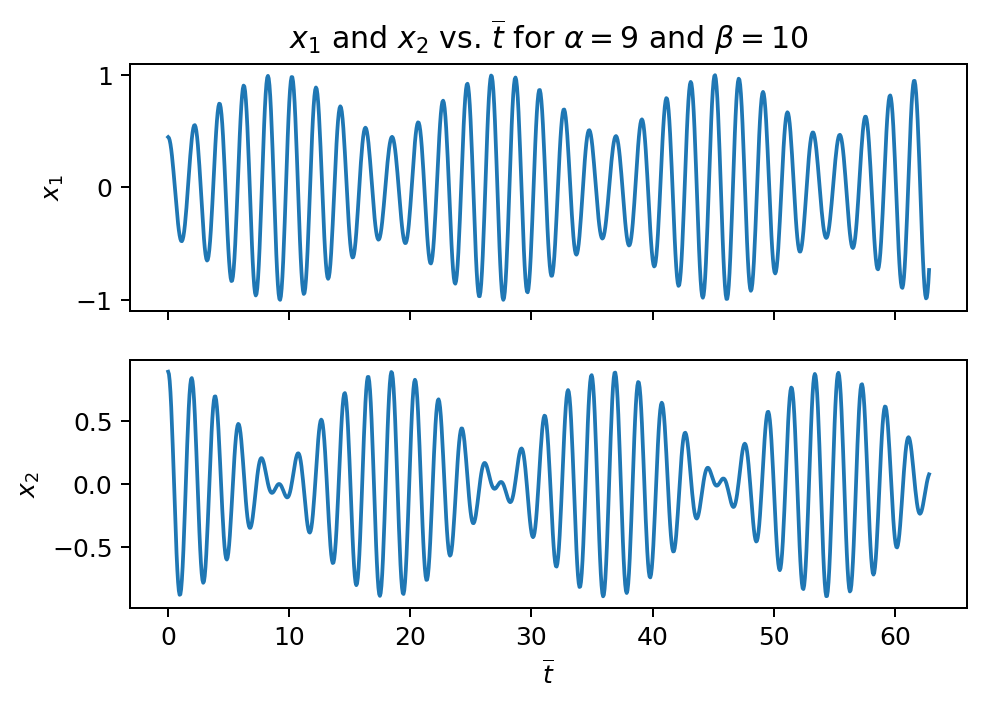

In [121]:
alpha = 9
beta = 10

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

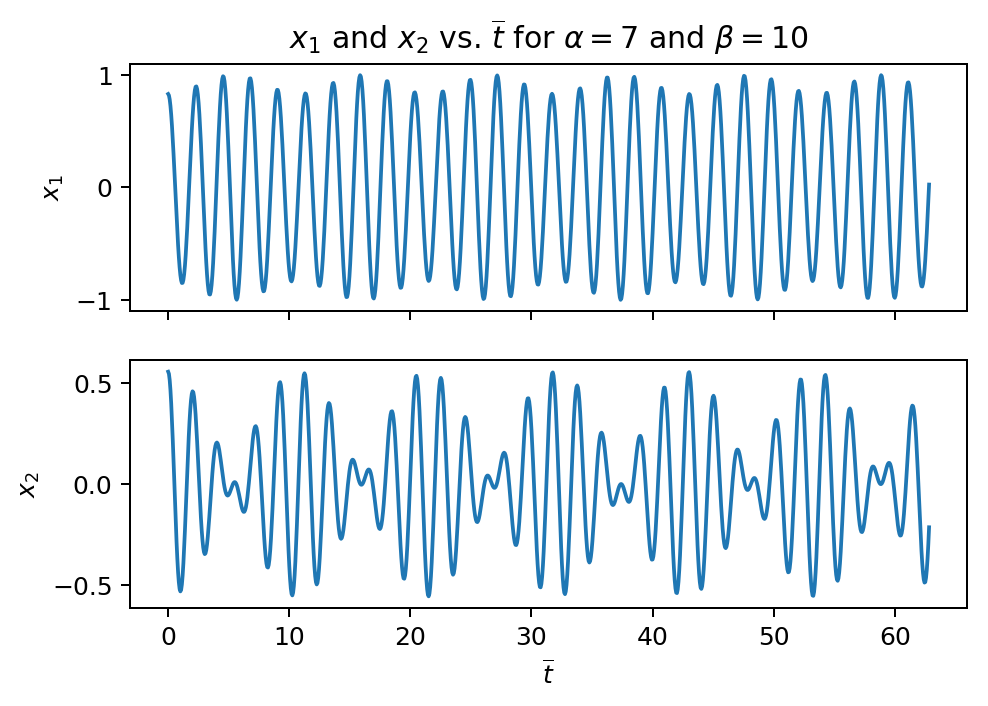

In [122]:
alpha = 7
beta = 10

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

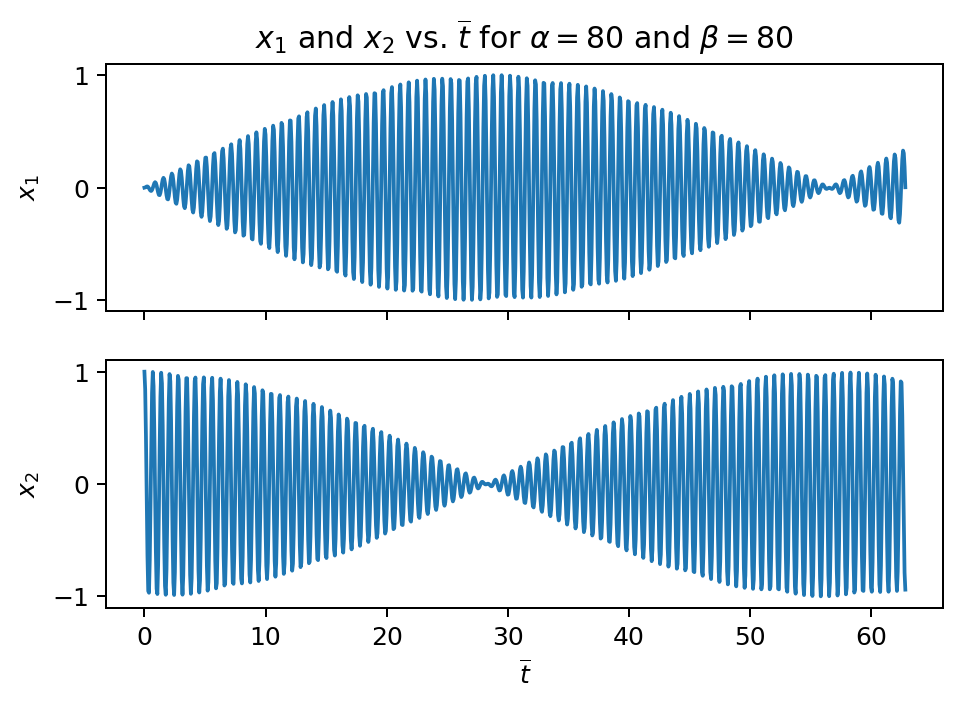

In [123]:
alpha = 80
beta = 80

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)

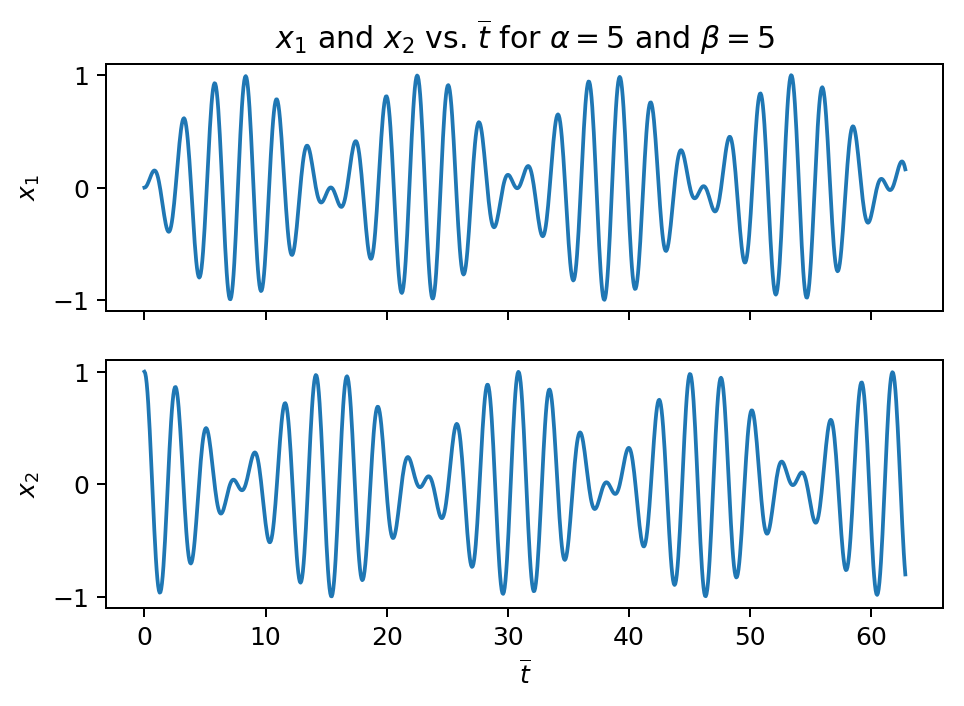

In [124]:
alpha = 5
beta = 5

t = np.linspace(0, 10*(2*np.pi), num=1000)
y1 = np.real(x1(t, alpha, beta))
y2 = np.real(x2(t, alpha, beta))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t, y1)
ax[1].plot(t, y2)

title = r'$x_1$ and $x_2$ vs. $\overline{t}$ for $\alpha = $' \
            + str(alpha) + r' and $\beta = $' + str(beta)
    
ax[0].set_title(title)
ax[0].set_ylabel(r'$x_1$')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$\overline{t}$')

filename = '12_2_Figures\\Alpha_' + str(alpha) + '_Beta_' + str(beta) + '.png'
fig.savefig(filename)